# Etapas
1. Entendimento do Problema;
2. Entendimento dos Dados;
3. Tratamento dos Dados;
4. Análise Exploratória de Dados;
5. Definição da Arquitetura, Criação da Rede e Execução do Primeiro Modelo;
6. Extra: Criação do Segundo Modelo com Tunagem de Hiperparâmetros;
7. Avaliando os Modelos: Sumários, Métricas e Conclusões.

## 1. Entendimento do Problema
- Trata-se de um problema de classificação binária em que temos dados de pacientes e a classificação dos seus tumores benigno ou maligno. São dados fictícios e o intuito aqui é criar um projeto end-to-end que envolva uma solução com redes neurais.
- Este é o primeiro de vários projetos com redes neurais que estarão em meu portfólio.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

# Configurando objetos Pandas DataFrame e Numpy Arrays para exibirem todas as informações
np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Configurando estilo e paleta de cores que serão utilizadas nos gráficos
sns.set_theme(style="whitegrid", palette="viridis")
sns.color_palette('viridis')

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

In [2]:
df = pd.read_csv('C:\\Users\\gustavo rios\\Desktop\\backup julho 24\\Python for Data Science and Machine Learning Bootcamp\\DATA\\cancer_classification.csv')

## 2. Entendimento dos Dados

- Informações Gerais: Tipagem, quantidade de variáveis e instâncias, dados faltantes, discrepantes, duplicados e infinitos.

In [4]:
df.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### Verificando Dados Nulos

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

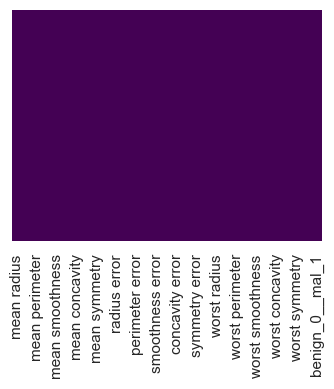

In [7]:
plt.figure(figsize=(4,3))
sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis')
df.isnull().sum()

### Verificando Dados Duplicados

In [9]:
display(df.duplicated().sum())
display(df.duplicated().sum() / len(df))

0

0.0

### Verificando Dados Infinitos

In [11]:
np.isinf(df.select_dtypes('number')).sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

### Verificando Dados Discrepantes (Outliers)
- Primeira Verificação (Z-score): O Z-score é uma medida estatística que indica o quão longe um dado está da média em termos de desvios padrão. Valores de Z-score muito altos (geralmente acima de 2 ou 3 desvios padrão) podem indicar a presença de outliers.
- Segunda Verificação (IQR): O IQR é a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1). Os valores que estão muito abaixo de Q1 - 1,5 * IQR ou muito acima de Q3 + 1,5 * IQR são considerados outliers pelo método IQR.
- Terceira Verificação (Boxplot): Serão feitos gráficos de boxplot em que os outliers serão representados como pontos fora dos limites de cada caixa;

In [13]:
# Z-score
from scipy.stats import zscore

# Calcular o Z-score para todas as variáveis numéricas
df_zscore = df.select_dtypes(include=['number']).apply(zscore)

# Identificar outliers usando o Z-score (valores com Z-score > 3 ou < -3 são considerados outliers)
outliers_zscore = df_zscore[(df_zscore > 3) | (df_zscore < -3)].any(axis=1)
print(f'Número de outliers identificados pelo Z-score: {outliers_zscore.sum()}\n')

# Identificar outliers usando o Z-score (valores com Z-score > 3 ou < -3 são considerados outliers)
outliers_zscore = df_zscore[(df_zscore > 3) | (df_zscore < -3)]

# Visualizar os outliers por coluna
outliers_by_column = outliers_zscore.stack().reset_index()
outliers_by_column.columns = ['Index', 'Column', 'Z-score']
print("Outliers identificados por coluna:")

# Exibindo apenas 5 pois foram muitos resultados
print(outliers_by_column.head())

# Visualizar os outliers por instância
outliers_by_instance = outliers_zscore.any(axis=1)
outliers_indices = outliers_by_instance[outliers_by_instance].index
print("\nÍndices das instâncias com outliers:")
print(outliers_indices)

Número de outliers identificados pelo Z-score: 74

Outliers identificados por coluna:
   Index                  Column   Z-score
0      0        mean compactness  3.283515
1      3         mean smoothness  3.283553
2      3        mean compactness  3.402909
3      3  mean fractal dimension  4.910919
4      3          symmetry error  4.732680

Índices das instâncias com outliers:
Index([  0,   3,   9,  12,  14,  23,  25,  31,  35,  42,  60,  68,  71,  72,
        78,  82,  83, 105, 108, 112, 116, 119, 122, 138, 146, 151, 152, 176,
       180, 181, 190, 192, 202, 203, 212, 213, 219, 232, 236, 239, 258, 259,
       265, 288, 290, 314, 318, 323, 339, 345, 351, 352, 368, 370, 376, 379,
       388, 389, 400, 416, 417, 430, 461, 473, 503, 504, 505, 521, 557, 559,
       561, 562, 567, 568],
      dtype='int64')


In [14]:
# IQR

# Filtrar o DataFrame original para incluir apenas colunas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Calcular o IQR (Intervalo Interquartil) para cada variável numérica
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers em cada coluna numérica usando o método IQR
outliers_indices = []
outliers_columns = []

for col in df_numeric.columns:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        outliers_indices.extend(outliers.index)
        outliers_columns.extend([col] * len(outliers))

# Criar um DataFrame com os índices das instâncias com outliers e as colunas correspondentes
outliers_df = pd.DataFrame({'Index': outliers_indices, 'Outlier_Column': outliers_columns})

# Mostrar o número de outliers identificados e a tabela com os índices das instâncias e colunas com outliers
print("Número de outliers identificados pelo método IQR:", len(outliers_df))
print("\nÍndices das instâncias com outliers e colunas correspondentes:")
print(outliers_df.sample(4))

Número de outliers identificados pelo método IQR: 608

Índices das instâncias com outliers e colunas correspondentes:
     Index           Outlier_Column
594    118  worst fractal dimension
2      122              mean radius
227    369          perimeter error
352    430        compactness error


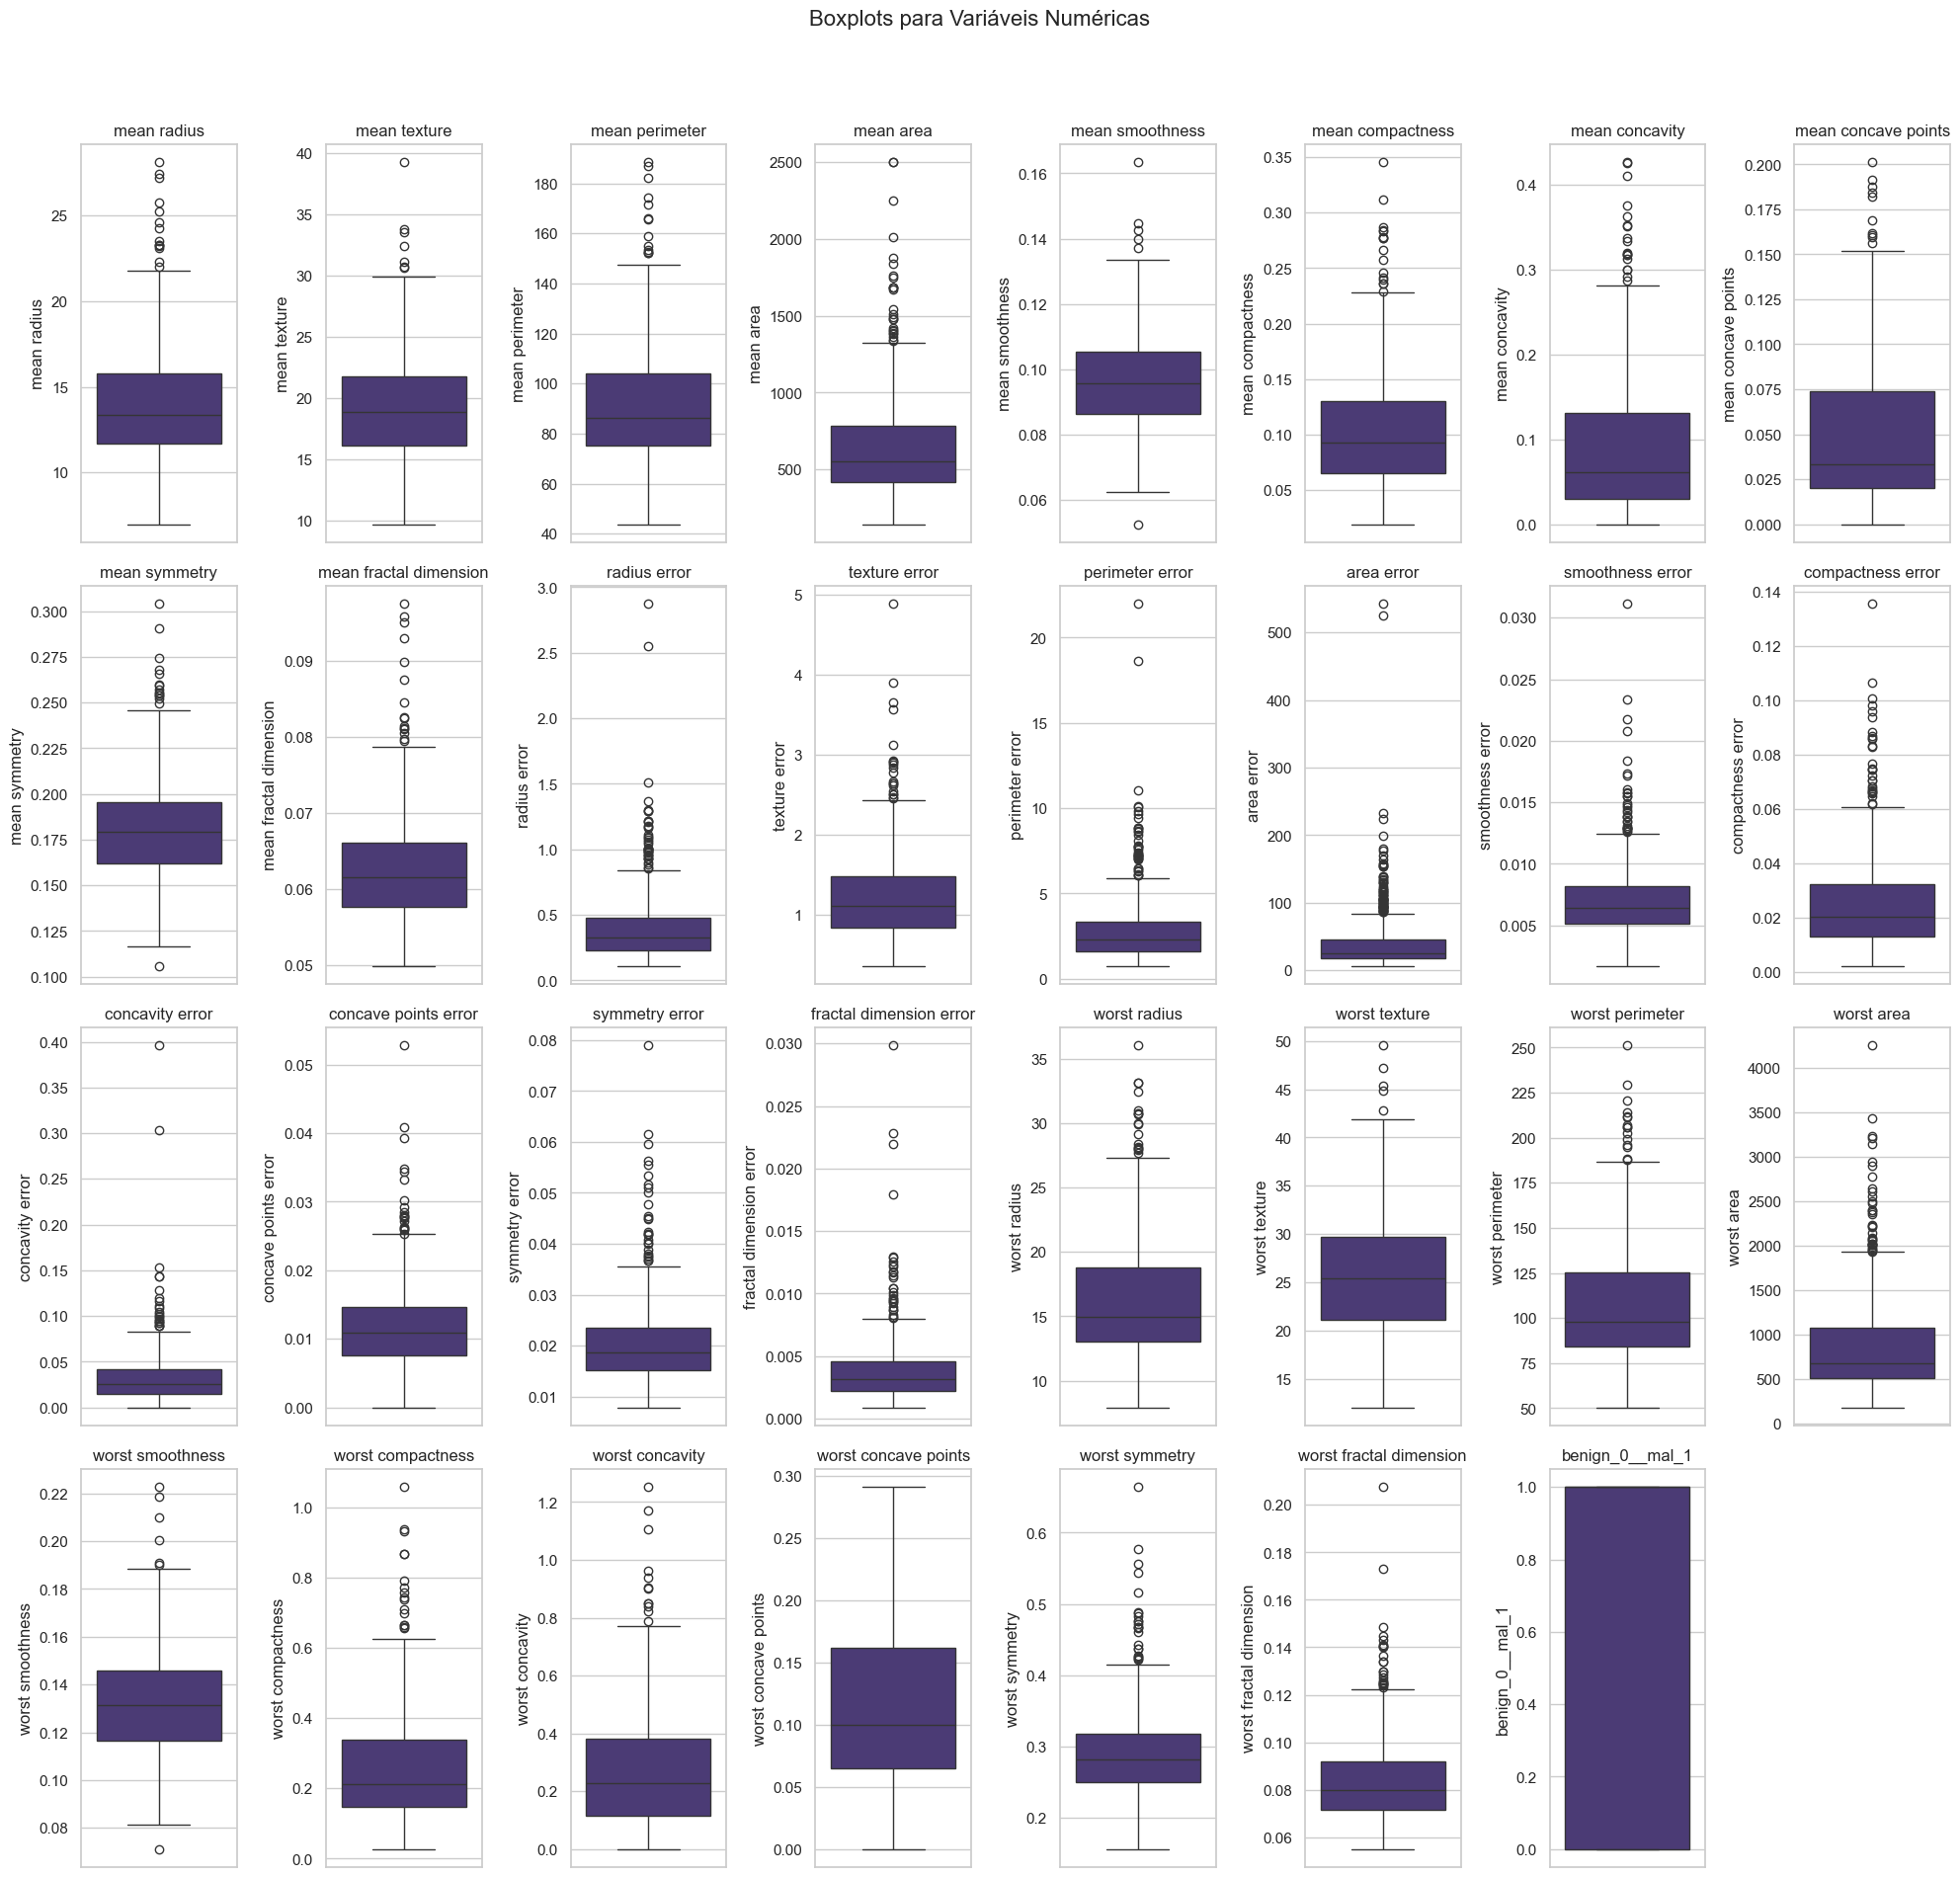

In [15]:
# Filtrando apenas a lista das variáveis numéricas
numeric_columns = df.select_dtypes(include=['number']).columns

# Configuração dos subplots
num_plots = len(numeric_columns)
plots_per_row = 8
num_rows = (num_plots + plots_per_row - 1) // plots_per_row

fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(20, 5 * num_rows))
fig.suptitle('Boxplots para Variáveis Numéricas', fontsize=16)

# Criar boxplots para cada variável numérica
for i, col in enumerate(numeric_columns):
    row = i // plots_per_row
    col_idx = i % plots_per_row
    sns.boxplot(y=df[col], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(col, fontsize=12)

# Remover eixos não utilizados
for j in range(i + 1, num_rows * plots_per_row):
    row = j // plots_per_row
    col_idx = j % plots_per_row
    fig.delaxes(axes[row, col_idx])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajustar a disposição dos subplots e o título principal
plt.show()

### Correlações e Estatísticas Descritivas

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Maiores Correlações Positivas:
1: mean radius - mean perimeter: 0.9978552814938109
2: worst radius - worst perimeter: 0.993707916102949
3: mean radius - mean area: 0.9873571700566127
4: mean area - mean perimeter: 0.9865068039913907
5: worst radius - worst area: 0.9840145644590742
6: worst perimeter - worst area: 0.9775780914063871
7: perimeter error - radius error: 0.9727936770160764
8: mean perimeter - worst perimeter: 0.9703868870426394
9: worst radius - mean radius: 0.9695389726112055
10: mean perimeter - worst radius: 0.9694763634663146

Maiores Correlações Negativas:
1: worst concave points - benign_0__mal_1: -0.79356601714127
2: benign_0__mal_1 - worst perimeter: -0.7829141371737594
3: mean concave points - benign_0__mal_1: -0.776613840020437
4: benign_0__mal_1 - worst radius: -0.77645377859504
5: mean perimeter - benign_0__mal_1: -0.7426355297258337
6: benign_0__mal_1 - worst area: -0.7338250349210507
7: mean radius - benign_0__mal_1: -0.7300285113754563
8: benign_0__mal_1 - me

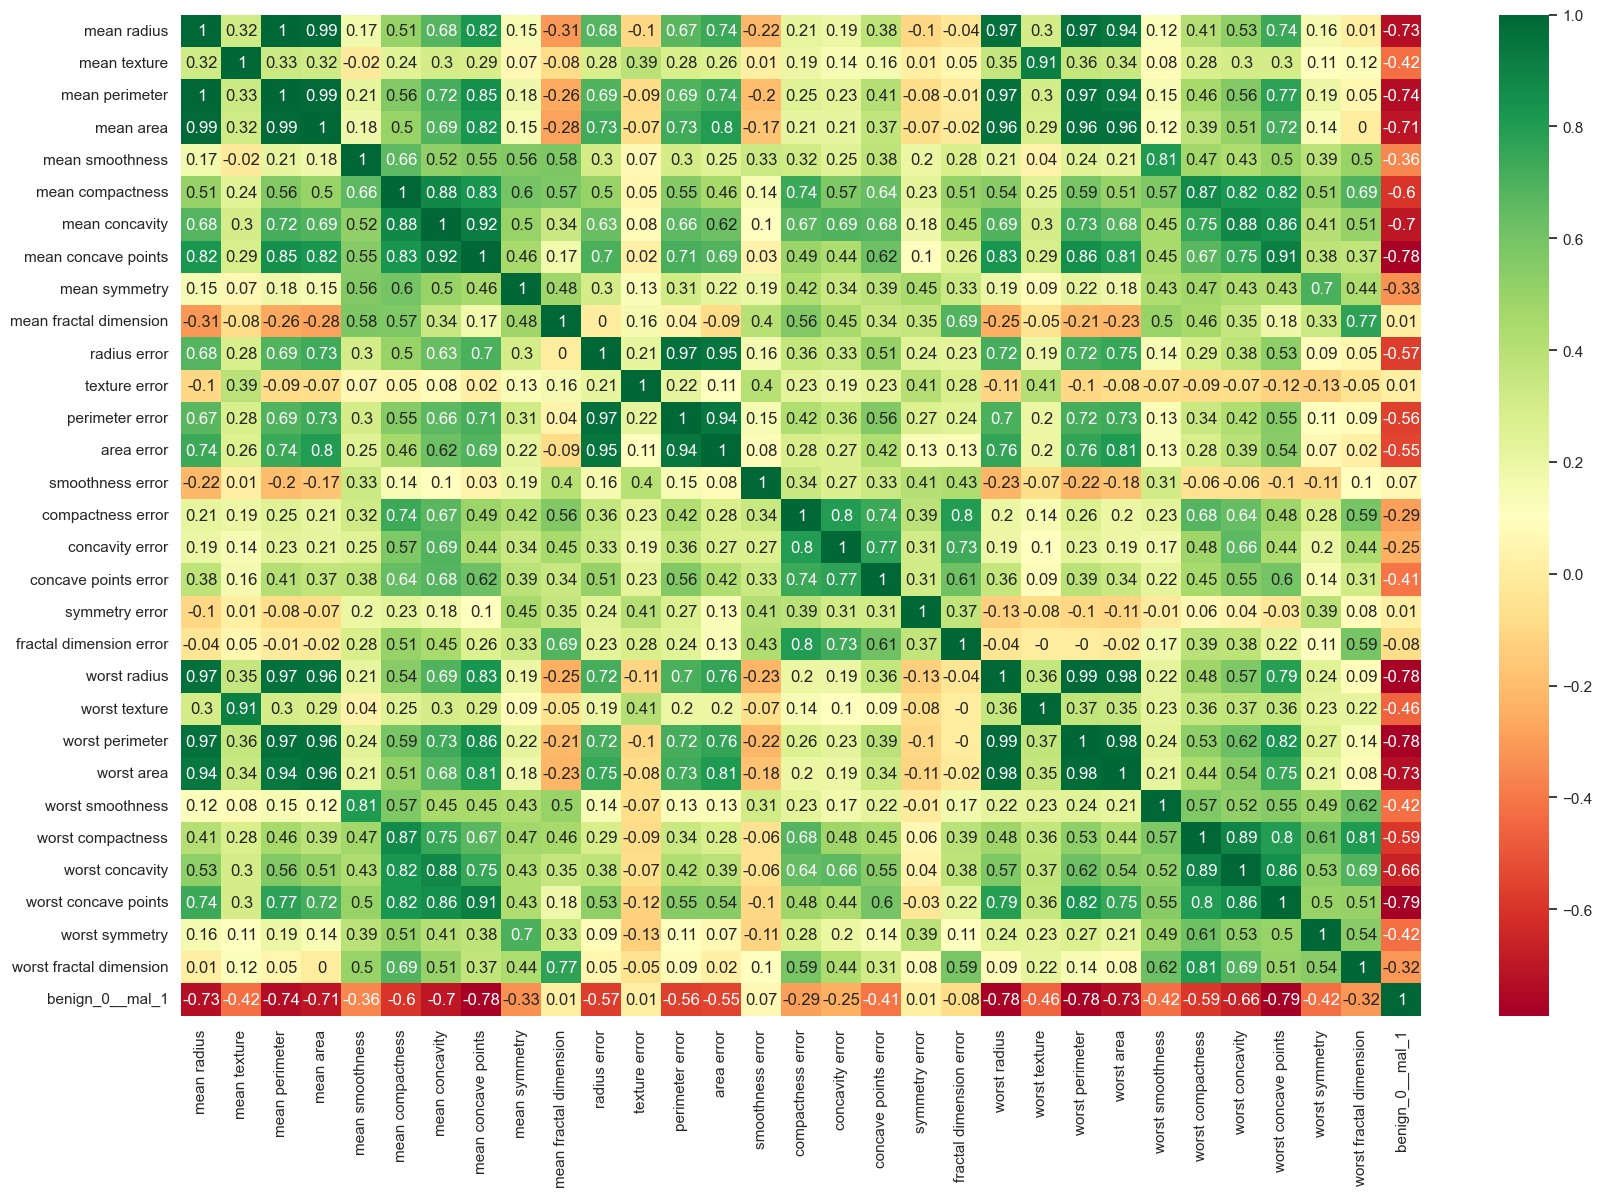

In [18]:
def print_top_correlations(df):
    correlation_matrix = df.corr(numeric_only=True)
    plt.figure(figsize=(20,13))
    sns.heatmap(data=round(correlation_matrix,2),
                annot=True,
                cmap='RdYlGn')

    top_correlations = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()

    # Pegue as 10 maiores correlações (ignorando a correlação com si mesmo, que sempre será 1.0)
    top_10_correlations = top_correlations[top_correlations.index.get_level_values(0) != top_correlations.index.get_level_values(1)].head(10)
    #display(correlation_matrix)
    count = 0
    print(f'Maiores Correlações Positivas:')
    for index, value in top_10_correlations.items():
        count += 1
        print(f"{count}: {index[0]} - {index[1]}: {value}")

    # Pegue as 10 menores correlações (ignorando a correlação com si mesmo, que sempre será 1.0)
    top_10_correlations = top_correlations[top_correlations.index.get_level_values(0) != top_correlations.index.get_level_values(1)].tail(10)
    top_10_correlations.sort_values(ascending=True,inplace=True)
    count = 0
    print(f'\nMaiores Correlações Negativas:')
    for index, value in top_10_correlations.items():
        count += 1
        print(f"{count}: {index[0]} - {index[1]}: {value}")
print_top_correlations(df)

## Análise Exploratória de Dados
- Nesta EDA focarei no label `'benign_0__mal_1'` para entendermos melhor sua distribuição e mais a frente como modelar a rede neural com as melhores features.

### Distribuição do Label
- A distribuição do label nos permite entender se será necessário ou não realizar um balanceamento da classe.

Quantidade de casos Benignos: 357 - 62.7% do total de casos. 
Quantidade de casos Malignos: 212 - 37.3% do total de casos. 


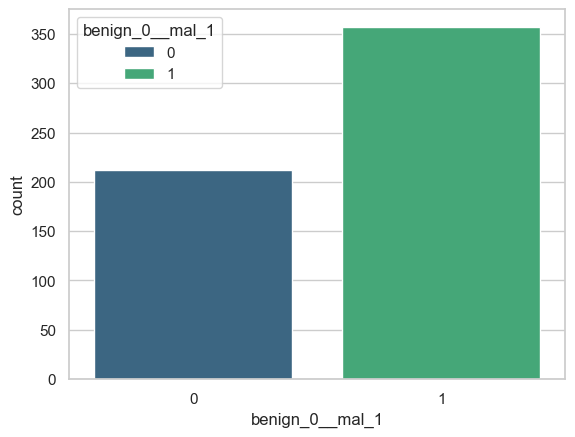

In [21]:
sns.countplot(data=df,
              x='benign_0__mal_1', 
              palette='viridis',
              hue='benign_0__mal_1')
print(f'Quantidade de casos Benignos: {len(df[df['benign_0__mal_1'] == 1])} - {round((len(df[df['benign_0__mal_1'] == 1]) / len(df))*100, 1)}% do total de casos. ')
print(f'Quantidade de casos Malignos: {len(df[df['benign_0__mal_1'] == 0])} - {round((len(df[df['benign_0__mal_1'] == 0]) / len(df))*100, 1)}% do total de casos. ')

### Correlações com o Label

In [23]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

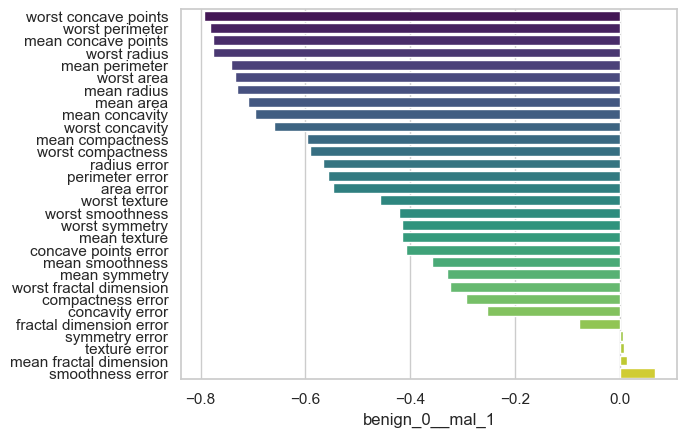

worst concave points   -0.793566
worst perimeter        -0.782914
mean concave points    -0.776614
worst radius           -0.776454
mean perimeter         -0.742636
worst area             -0.733825
mean radius            -0.730029
mean area              -0.708984
mean concavity         -0.696360
worst concavity        -0.659610
Name: benign_0__mal_1, dtype: float64

In [24]:
sns.barplot(data=df.corr()['benign_0__mal_1'][:-1].sort_values(), # [:-1] é para eliminar a coluna do label
            orient='h',
            palette='viridis')
plt.show()
display(df.corr()['benign_0__mal_1'].sort_values().head(10))

## Divisão em Treino e Teste

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop('benign_0__mal_1', axis='columns')
y = df['benign_0__mal_1']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling
- Os dados serão escalonados utilizando o `MinMaxScaler` para ajustar os valores das variáveis para o intervalo [0, 1].

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
X_train = scaler.fit_transform(X_train)

In [33]:
X_test = scaler.fit_transform(X_test)

## Arquitetura da Rede Neural



| Camada                | Neurônios | Função de Ativação | Observações                          |
|-----------------------|-----------|--------------------|--------------------------------------|
| **Entrada**           | 30        | -                  | 30 features de entrada               |
| **Primeira Oculta**   | 256       | ReLU               | Início com 256 neurônios             |
| **Segunda Oculta**    | 128       | ReLU               | Redução para 128 neurônios           |
| **Terceira Oculta**   | 64        | ReLU               | Redução para 64 neurônios            |
| **Quarta Oculta**     | 32        | ReLU               | Redução para 32 neurônios            |
| **Saída**             | 1         | Sigmoid            | Classificação binária                |

### Função de Perda e Otimizador
- Função de Perda: `Binary Cross-Entropy`
- Otimizador: `Adam`

### Métricas de Avaliação
- Precisão (Accuracy)
- AUC-ROC
- F1-Score
- Precisão (Precision)
- Revocação (Recall)

### Regularização
- Dropout: Após cada camada oculta (taxa de 0.5)
- Regularização L2: Adicionada aos pesos das camadas densas

### Número de Epochs e Batch Size
- Epochs: 100
- Batch Size: 64

### Como identificar e lidar com overfitting por meio de Early Stopping Callbacks e Dropout Layers
- Early Stopping é feito pelo keras para pausar o treinamento baseado em uma condição loss nos dados de validação, passados durante o model.fit()
- Dropout layers são camadas adicionadas para desativar os neuronios durante o treinamento para evitar overfitting, cada dropout layer dropará uma % pre-definida dos neuronios do layer anterior a cada lote, em ultima instancia significa que certos neuronios não terão seus pesos e vieses afetados durante um lote, sao apenas desligados.

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [38]:
model = Sequential()

In [39]:
neurons = 256
first_layer = True

while neurons >= 32:
    if first_layer:
        # Primeira camada
        model.add(Dense(units=neurons, activation='relu', input_shape=(X_train.shape[1],)))
        model.add(Dropout(0.5))  # Adicionando Dropout para regularização
        first_layer = False
    else:
        # Camadas ocultas
        model.add(Dense(units=neurons, activation='relu'))
        model.add(Dropout(0.5))  # Adicionando Dropout para regularização
    neurons //= 2
    
# Camada de saída para classificação binária
model.add(Dense(units=1, activation='sigmoid')) 

# Verificando a rede
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,201 (200.00 KB)

 Trainable params: 51,201 (200.00 KB)

 Non-trainable params: 0 (0.00 B)

### Compilando o Modelo
- Definindo otimizador `adam`, a função perda `crossentropia binária` e métricas de avaliação para melhor monitorar o desempenho do modelo.

In [41]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Ajustando o modelo aos dados de treino

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [45]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5746 - loss: 0.6959 - val_accuracy: 0.9123 - val_loss: 0.6392
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6005 - loss: 0.6798 - val_accuracy: 0.8947 - val_loss: 0.5804
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6861 - loss: 0.6374 - val_accuracy: 0.9035 - val_loss: 0.5028
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7719 - loss: 0.5592 - val_accuracy: 0.9123 - val_loss: 0.3840
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8178 - loss: 0.4750 - val_accuracy: 0.9211 - val_loss: 0.2834
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8571 - loss: 0.3810 - val_accuracy: 0.8947 - val_loss: 0.2419
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8577 - loss: 0.3588 - val_accuracy: 0.9298 - val_loss: 0.1773
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8629 - loss: 0.3284 - val_accuracy: 0.9474 - v

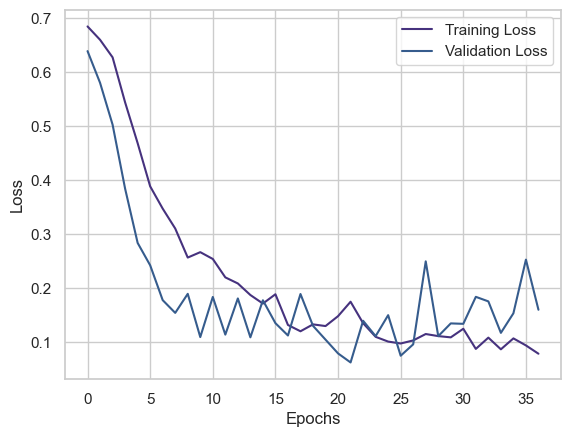

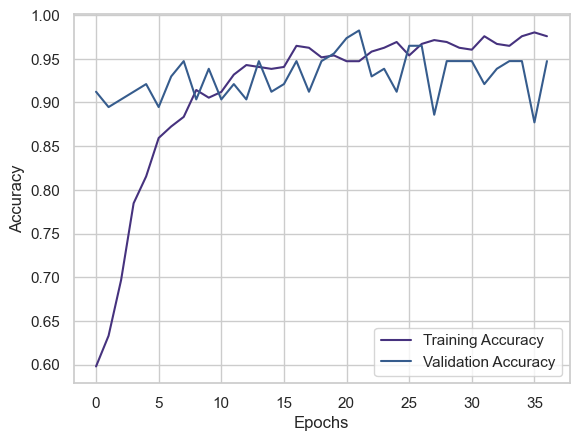

In [46]:
# Visualizando as métricas
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [47]:
predictions = model.predict(X_test)
predictions[:3]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


array([[7.5667632e-01],
       [1.4098731e-05],
       [1.9439436e-03]], dtype=float32)

In [48]:
predictions = model.predict(X_test)

# Classificação binária, comparar as previsões com o limiar/threshold de 0.5
predicted_classes = (predictions >= 0.5).astype(int)
predicted_classes[:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step


array([[1],
       [0],
       [0],
       [1],
       [1]])

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



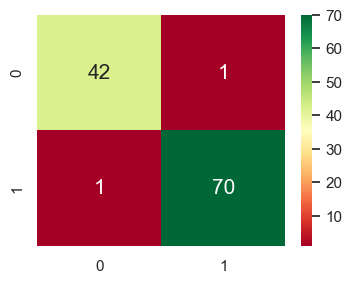

In [50]:
# Matriz de Confusão
matriz_confusao = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(4,3))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='RdYlGn', annot_kws={'fontsize': 15})

# Mostrando o relatório de classificação
print(classification_report(y_test, predicted_classes))

### Extra - Tunagem de hiperparâmetros com keras turner 
Nesta rápida abordagem demonstrarei uma execução com tunagem de hiperparâmetros:
- Número de Neurônios (neurons): Teste de diferentes tamanhos de camadas densas (fully connected layers) variando entre 32 e 512, em passos de 32.
- Taxa de Aprendizado (learning_rate): Teste de três taxas de aprendizado: 0.001, 0.0001, 0.00001
- Taxa de Dropout (dropout_rate): Teste de diferentes taxas de dropout variando entre 0.2 e 0.5, em passos de 0.1.

In [52]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

In [53]:
# Função para construir o modelo
def build_model(hp):
    model = Sequential()
    neurons = hp.Int('neurons', min_value=64, max_value=528, step=32)
    model.add(Dense(units=neurons, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(hp.Float('dropout_rate', 0.2, 0.5, step=0.1)))
    
    while neurons >= 64:
        neurons -= 32
        model.add(Dense(units=neurons, activation='relu'))
        model.add(Dropout(hp.Float('dropout_rate', 0.2, 0.5, step=0.1)))
        
    model.add(Dense(units=1, activation='sigmoid'))
    
    learning_rate = hp.Choice('learning_rate', values=[0.001, 0.0001, 0.00001])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [54]:
# Definindo o tuner
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=20,
                        executions_per_trial=5,
                        directory='my_dir',
                        project_name='breast_cancer_classification')

# Resumo da busca
tuner.search_space_summary()

Reloading Tuner from my_dir\breast_cancer_classification\tuner0.json
Search space summary
Default search space size: 3
neurons (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.0001, 'conditions': [], 'values': [0.0001, 1e-05], 'ordered': True}
dropout_rate (Float)
{'default': 0.2, 'conditions': [], 'min_value': 0.2, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}


In [55]:
# Callback para mostrar o último epoch
class PrintLastEpoch(LambdaCallback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch == self.params['epochs'] - 1:
            print(f'Métricas Finais Encontradas:')
            print(f'Final epoch: {epoch + 1}, Loss: {logs["loss"]}, Accuracy: {logs["accuracy"]}, Val Loss: {logs["val_loss"]}, Val Accuracy: {logs["val_accuracy"]}.')
            
# Função que mostrará os resultados do melhor modelo
def best_hyperparameters():
    print(f"A busca por hiperparâmetros está completa.") 
    print(f"O número ideal de unidades na primeira camada densamente conectada é {best_hps.get('neurons')}.") 
    print(f"A taxa de aprendizado ideal para o otimizador é {best_hps.get('learning_rate')}.") 
    print(f"A taxa de dropout ideal é {best_hps.get('dropout_rate')}.")

In [56]:
# Realizando a busca pelos melhores hiperparâmetros
tuner.search(X_train, y_train,
             epochs=100,
             validation_data=(X_test, y_test),
             verbose=0,
             callbacks=[EarlyStopping(monitor='val_loss', patience=15)])

# Obtendo os melhores hiperparâmetros
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    
# Print dos melhores hiperparâmetros
best_hyperparameters()

A busca por hiperparâmetros está completa.
O número ideal de unidades na primeira camada densamente conectada é 128.
A taxa de aprendizado ideal para o otimizador é 0.0001.
A taxa de dropout ideal é 0.30000000000000004.


In [57]:
# Treinando o modelo final com os melhores hiperparâmetros
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train,
                    epochs=100,
                    validation_data=(X_test, y_test),
                    verbose=0,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=15), PrintLastEpoch()])
display(history)

Métricas Finais Encontradas:
Final epoch: 100, Loss: 0.1717091202735901, Accuracy: 0.9384615421295166, Val Loss: 0.11192718148231506, Val Accuracy: 0.9473684430122375.


### Visualizando as métricas

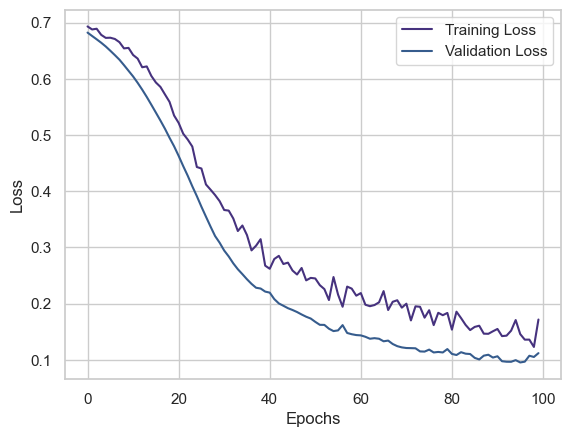

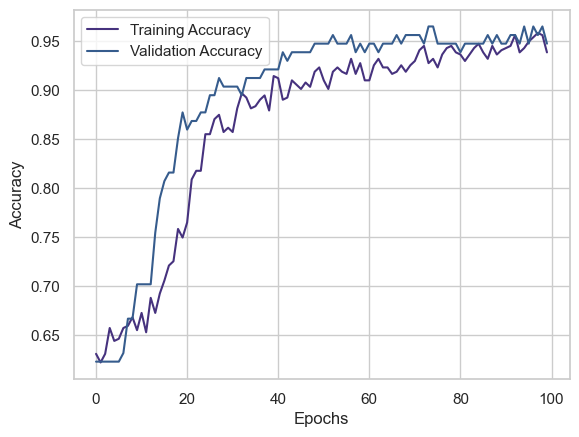

In [59]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [60]:
predictions = model.predict(X_test)

# Classificação binária, comparar as previsões com o limiar/threshold de 0.5
predicted_classes = (predictions >= 0.5).astype(int)
predicted_classes[:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


array([[1],
       [0],
       [0],
       [1],
       [1]])

              precision    recall  f1-score   support

           0       1.00      0.86      0.93        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



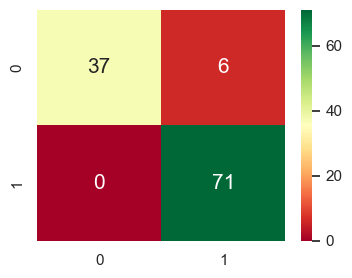

In [61]:
# Matriz de Confusão
matriz_confusao = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(4,3))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='RdYlGn', annot_kws={'fontsize': 15})

# Mostrando o relatório de classificação
print(classification_report(y_test, predicted_classes))

## Conclusões 

Neste projeto quis demonstrar parte dos meus estudos envolvendo redes neurais e aprendizado profundo, os dados foram analisados e tratados de forma a trazer dados preparados para a execução do modelo.
Encontrei uma discrepância moderada no equilíbrio/balanceamento das classes 62.7% e 37.3%. 
Primeiramente criei um modelo mais simples, seguindo a arquitetura prevista, e por fim fiz um modelo na busca de encontrar os melhores parâmetros em uma rede neural que possam trazer melhor performance ao modelo.

Os resultados foram bastante similares, a primeira abordagem (sem a busca por hiperparâmetros) apresentou um desempenho geral um pouco melhor em todas as métricas principais (precisão, recall, F1-score e acurácia) comparado a segunda abordagem (com busca por hiperparâmetros). Isso pode indicar que os hiperparâmetros padrão já estavam bem ajustados para este problema específico, ou que o modelo se beneficiaria de uma busca mais extensa por hiperparâmetros ou de outras técnicas de ajuste.

Gostaria de agradecer por mais este projeto realizado, este foi o primeiro de vários projetos envolvendo redes neurais que irão para meu portfólio, coloco a disposição para quaisquer dúvidas.

Gustavo Silva Rios